In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data preparation

ADA

In [ ]:
!unzip "/content/drive/MyDrive/001_projects/FSL/data/human_annotated/update-190.zip"

In [ ]:
!unzip "/content/drive/MyDrive/001_projects/FSL/FSL_annotations/CIGNA_DENTAL_ADA/batch_1/Cigna_Dental.zip"

In [ ]:
!unzip "/content/drive/MyDrive/001_projects/FSL/FSL_annotations/CIGNA_DENTAL_ADA/batch_1/project-8-at-2024-01-05-17-49-50518453_CIGNA_ADA_51_YOLO.zip"

HCFA

In [ ]:
!unzip "/content/drive/MyDrive/001_projects/FSL/data/augmented_data/hcfa_augmented_data_100.zip"

In [ ]:
!unzip "/content/drive/MyDrive/001_projects/FSL/data/yolo_data/HCFA_data_yolo/For_Annotation_500.zip"

In [ ]:
!unzip "/content/drive/MyDrive/001_projects/FSL/data/yolo_data/HCFA_data_yolo/HCFA_100_yolo.zip"

UB

#### Rename files from folders

In [ ]:
import os

def rename_files(folder_path, prefix, extension=".txt"):
    # Get a list of files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith(extension)]

    # Iterate through the files and rename them
    for i, filename in enumerate(files, start=1):
      try:
        old_path = os.path.join(folder_path, filename)
        new_filename = filename.split("-")[1]
        new_path = os.path.join(folder_path, new_filename)

        # Rename the file
        os.rename(old_path, new_path)
        print(f"Renamed {filename} to {new_filename}")
      except Exception as e:
        print(e)
        # break
# Example usage
folder_path = '/content/labels'
prefix = 'new_prefix'

rename_files(folder_path, prefix)

### Make a folder that has only needed images

In [ ]:
import os
import shutil

source_files_names = [os.path.splitext(file)[0] for file in os.listdir("/content/Cigna_Dental") if file.lower().endswith('.jpg')]
already_annotated_names = [os.path.splitext(file)[0] for file in os.listdir("/content/labels")]

# Get the list of files in both folders
source_files = set(source_files_names)
already_annotated_files = set(already_annotated_names)

In [ ]:
images_to_copy = source_files - already_annotated_files

In [ ]:
len(images_to_copy)

248

In [ ]:
os.makedirs("psudo_label_ada_299", exist_ok=True)

In [ ]:
for image in images_to_copy:
  source_path = os.path.join("/content/Cigna_Dental", f"{image}.jpg")
  destination_path = os.path.join("psudo_label_ada_299", f"{image}.jpg")
  shutil.copy2(source_path, destination_path)
  print(f"Copied: {image}")

In [ ]:
import os
import shutil

def copy_images(source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Get the list of files in both folders
    source_files = set(os.listdir(source_folder))
    destination_files = set(os.listdir(destination_folder))

    # Find the images in the destination folder that are not in the source folder
    images_to_copy = destination_files - source_files

    # Copy the images to the destination folder
    for image in images_to_copy:
        source_path = os.path.join(destination_folder, image)
        destination_path = os.path.join(destination_folder, image)
        shutil.copy2(source_path, destination_path)
        print(f"Copied: {image}")

# Specify the paths to the source and destination folders
source_folder = "/path/to/more_images"
destination_folder = "/path/to/destination_folder"

# Call the function to copy images
copy_images(source_folder, destination_folder)


### NOTE -:  Check if data is already splitted no need to do it

In [ ]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # Define paths
# root_folder = "/content/update-190"
# images_folder = os.path.join(root_folder, "images")
# labels_folder = os.path.join(root_folder, "labels")

# # Create train and val folders
# root_train_folder = os.path.join("data", "images", "train")
# root_val_folder = os.path.join("data", "images", "valid")
# root_train_labels_folder = os.path.join("data", "labels", "train")
# root_val_labels_folder = os.path.join("data", "labels", "valid")

# os.makedirs(root_train_folder, exist_ok=True)
# os.makedirs(root_val_folder, exist_ok=True)
# os.makedirs(root_train_labels_folder, exist_ok=True)
# os.makedirs(root_val_labels_folder, exist_ok=True)

# # Get list of image files
# image_files = [f for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))]

# # Split the dataset
# train_images, val_images = train_test_split(image_files, test_size=0.2, random_state=42)

# # Copy images to train folder
# for image in train_images:
#     shutil.copy(os.path.join(images_folder, image), os.path.join(root_train_folder, image))

# # Copy labels to train folder
# for image in train_images:
#     label_file = os.path.splitext(image)[0] + ".txt"
#     shutil.copy(os.path.join(labels_folder, label_file), os.path.join(root_train_labels_folder, label_file))

# # Copy images to val folder
# for image in val_images:
#     shutil.copy(os.path.join(images_folder, image), os.path.join(root_val_folder, image))

# # Copy labels to val folder
# for image in val_images:
#     label_file = os.path.splitext(image)[0] + ".txt"
#     shutil.copy(os.path.join(labels_folder, label_file), os.path.join(root_val_labels_folder, label_file))


In [ ]:
%%capture

!pip install ultralytics

### Start Inference

In [ ]:
from ultralytics import YOLO
from PIL import Image

In [ ]:
import os
os.environ['WANDB_DISABLED'] = 'true'
best_model_path = "/content/drive/MyDrive/001_projects/FSL/yolo_ada_initial_model_v1/train3/weights/best.pt"


psudo_image_folder = "/content/psudo_label_ada_299"
test_image_names = os.listdir(psudo_image_folder)

# Create a list of full paths for the images
full_paths = [os.path.join(psudo_image_folder, image_name) for image_name in test_image_names]


In [ ]:
chunk_size = 20
image_chunks = [full_paths[i:i + chunk_size] for i in range(0, len(full_paths), chunk_size)]

In [ ]:
# Load a pretrained model
model = YOLO(best_model_path)

In [ ]:
# Iterate through the chunks and run inference
for chunk in image_chunks:
  # Run inference on Test Image
  results = model(chunk, save_txt= True)  # results list
  print("DONE")


0: 1440x1440 1 10_Relationship, 1 11_Company_or_plan, 1 12_Policyholder_details, 1 13_DOB, 1 14_Gender, 1 15_SSN, 1 16_Plan_Number, 1 17_Employer_Name, 1 18_Relationship, 1 19_Use, 1 1_Type_of_Transaction, 1 20_Name, 1 21_DOB, 1 22_Gender, 1 23_Patient_ID, 1 24_31_Table, 1 2_Pre_Number, 1 31_A_Other_Fee, 1 32_Total_Fee, 1 33_Missing_Teeth, 1 34_A_Diag_Codes, 1 34_Code_list_Qualifier, 1 35_Remarks, 1 36_Signature, 1 37_Signature, 1 38_Place_of_treatment, 1 39_Enclosures, 1 3_Company_address, 1 40_Orthodontics, 1 41_Date, 1 42_Months_remaining, 1 43_Prosthesis, 1 44_Date, 1 45_Treatment_resulting_form, 1 46_Date_of_accident, 1 47_Auto_Accident_state, 1 48_Dentist_Address, 1 49_NPI, 1 4_Other_Coverage, 1 50_Licence_Number, 1 51_SSN_TIN, 1 52_A_Addl_Provider_id, 1 52_Phone_Number, 1 53_Signature, 1 54_NPI, 1 55_Licence_Number, 1 56_Address, 1 57_Phone_Number, 1 58_Addl_provider_id, 1 5_Name, 1 6_DOB, 1 7_Gender, 1 8_SSN, 1 9_Plan_Number, 1: 1440x1440 1 10_Relationship, 1 11_Company_or_pla

In [ ]:
import shutil

source_folder = "/content/psudo_label_ada_299"
destination_folder = "/content/psudo_label_ada_299/images"

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# List all files in the source folder
files_to_move = [file for file in os.listdir(source_folder) if file.endswith(".jpg")]

# Move each file to the destination folder
for file_name in files_to_move:
    source_path = os.path.join(source_folder, file_name)
    destination_path = os.path.join(destination_folder, file_name)
    shutil.move(source_path, destination_path)

In [ ]:
# Show the results
for r in results:
    im_array = r.plot(labels= False)  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results.jpg')  # save image

In [ ]:
!rm -rf "/content/psudo_lable_hcfa_500/images"

In [ ]:
!cp -r "/content/runs/detect/predict/labels" "/content/psudo_lable_hcfa_500"

In [ ]:
!zip -r "/content/psudo_label_ada_299.zip" "./psudo_label_ada_299"

In [ ]:
!cp -r "/content/psudo_label_ada_299.zip" "/content/drive/MyDrive/001_projects/FSL/FSL_annotations/CIGNA_DENTAL_ADA/batch_1"

## Run Sanity check on images and labels, to check if the annotation is proper

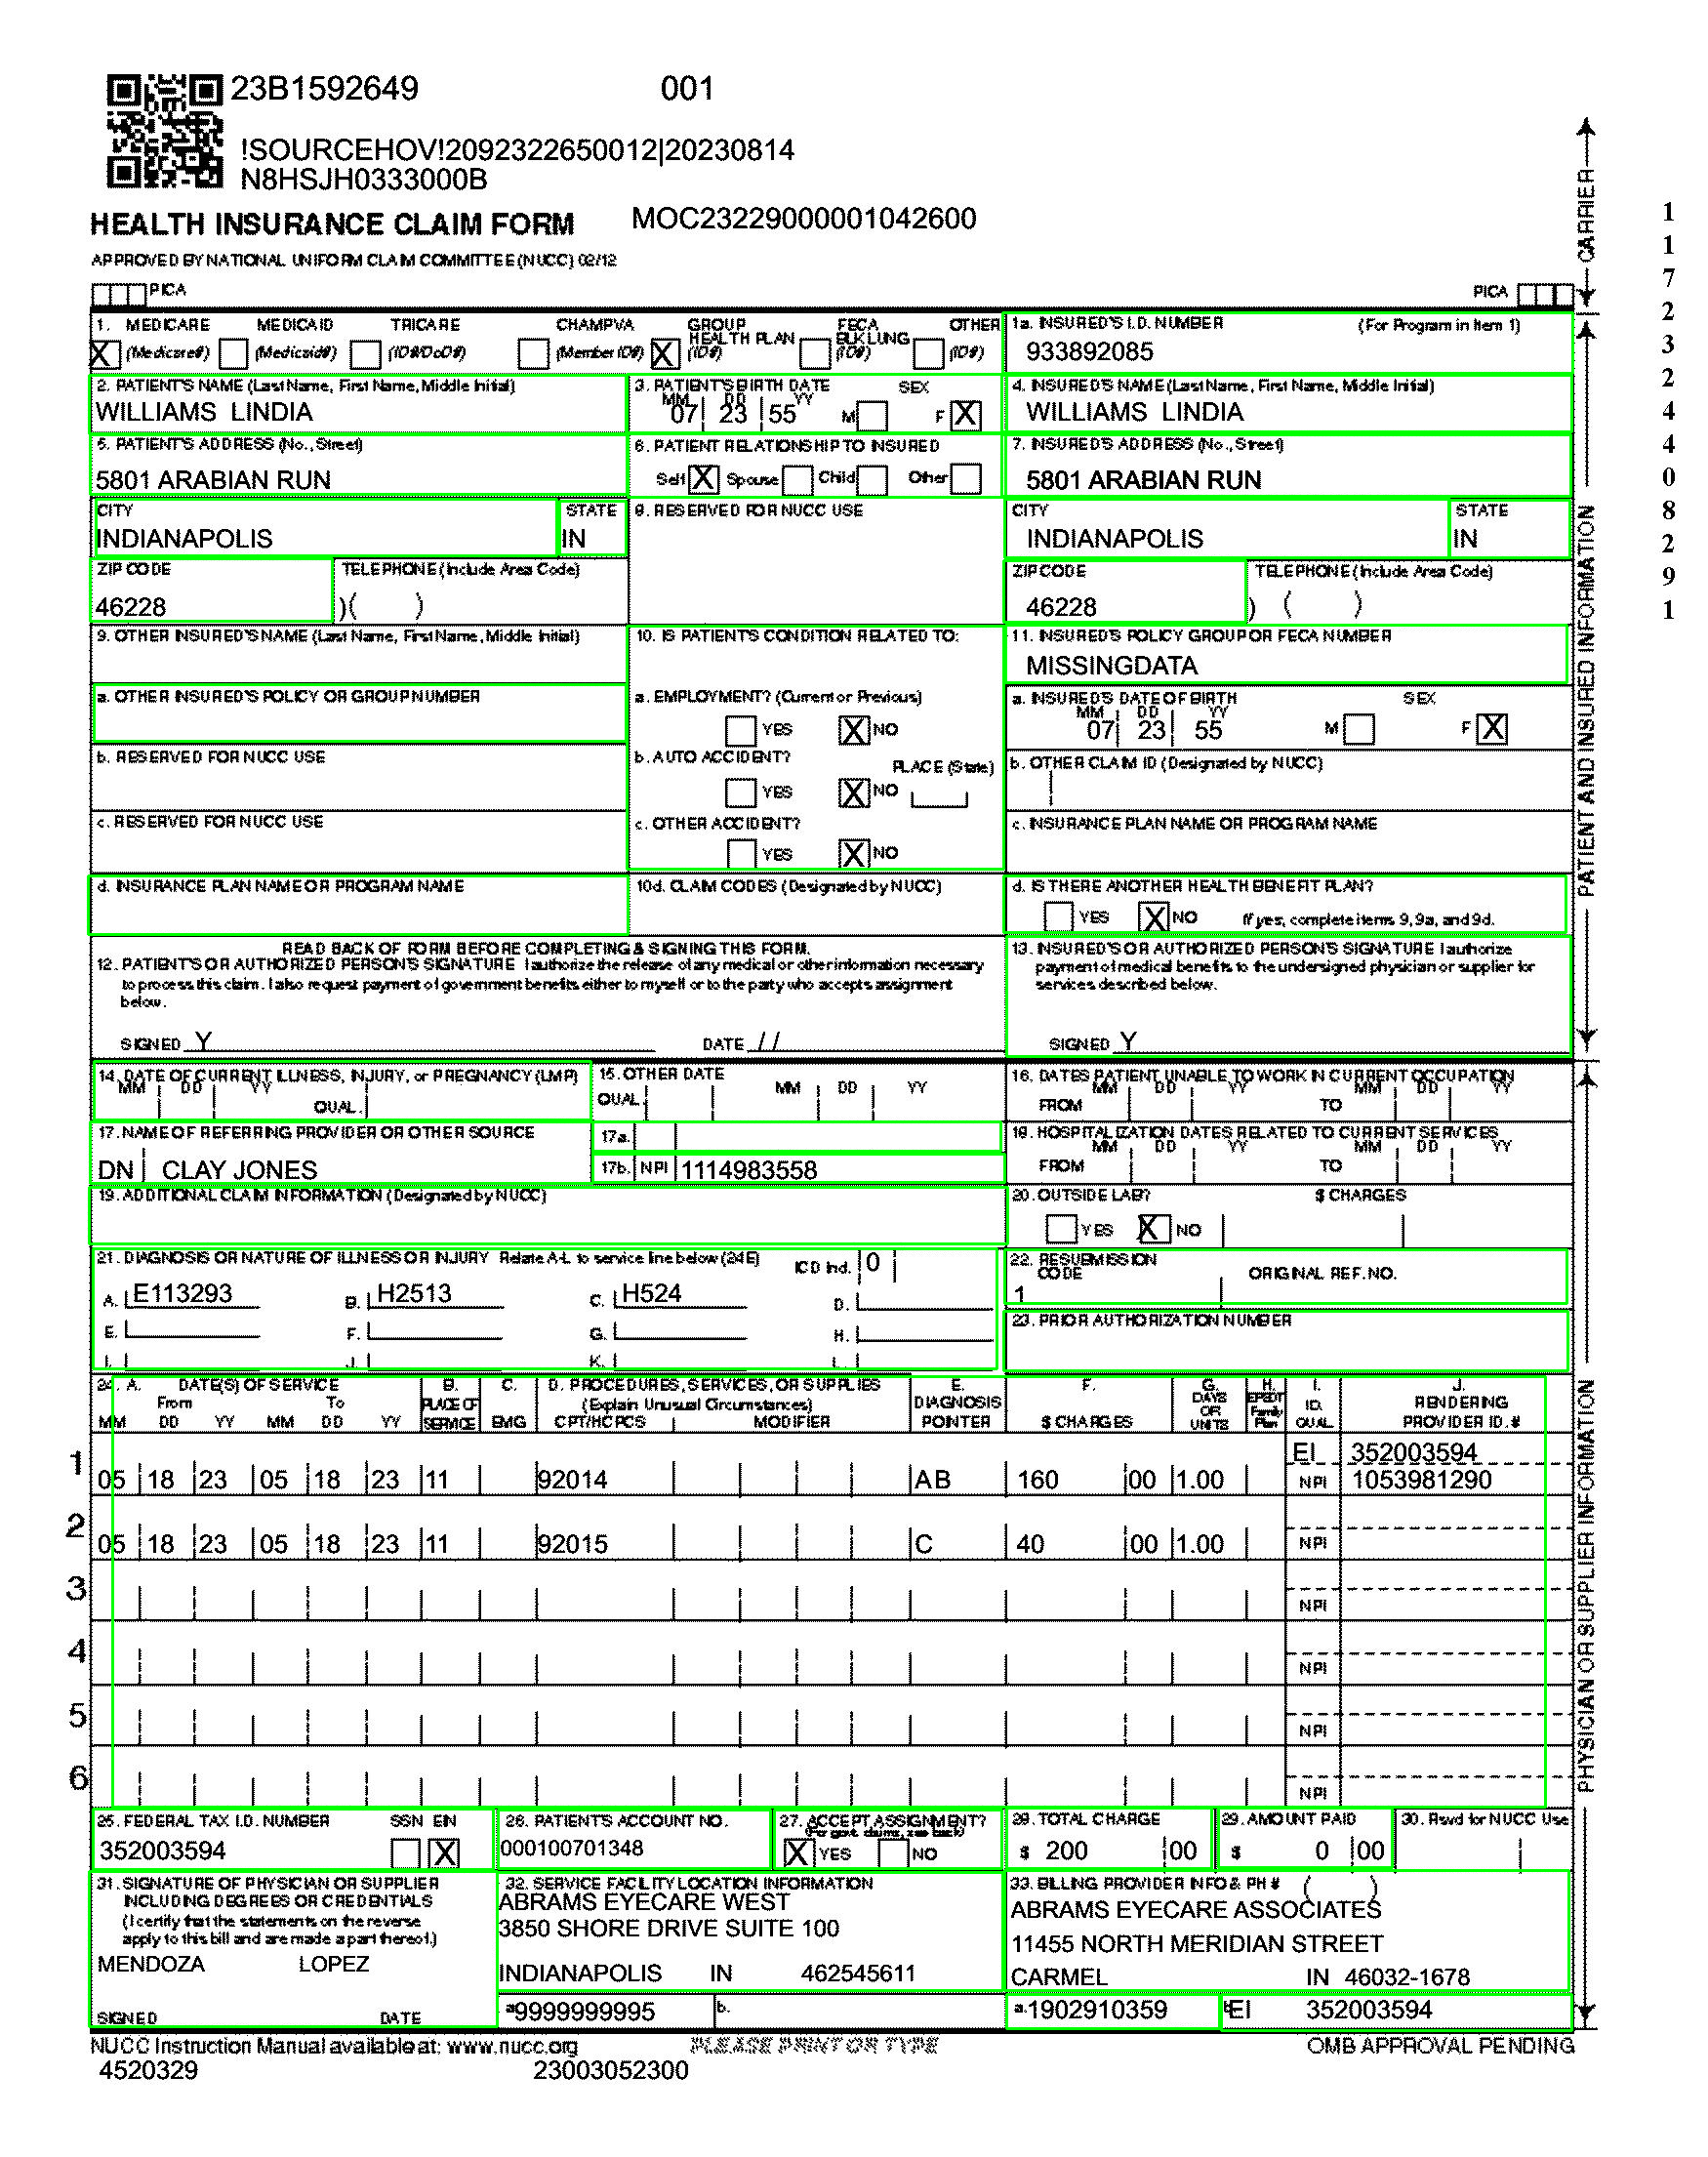

In [ ]:
import cv2

image_path = "/content/psudo_lable_hcfa_500/117914B4AZ003_001.jpg"
image = cv2.imread(image_path)

# Load corresponding label file
# label_name = os.path.splitext(image_name)[0] + ".txt"
label_path = "/content/runs/detect/predict/labels/117914B4AZ003_001.txt"

# Read YOLO annotations from the label file
with open(label_path, "r") as file:
    lines = file.readlines()

# Parse YOLO annotations (assuming normalized coordinates)
boxes = []
for line in lines:
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    x, y, w, h = (
        int((x_center - width / 2) * image.shape[1]),
        int((y_center - height / 2) * image.shape[0]),
        int(width * image.shape[1]),
        int(height * image.shape[0]),
    )
    boxes.append((x, y, x + w, y + h))

# Draw bounding boxes on the image
for box in boxes:
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

# Display or save the result
from google.colab.patches import cv2_imshow
cv2_imshow(image)